Based on the examdata.csv, build a logistic regression model to predict when `Exam1=75 Exam2=60`, can him pass Exam3.
Change the edge to square(`x1^2, x2^2`) and check if the performance will be better

In [3]:
# Load data
import pandas as pd
import numpy as np

data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


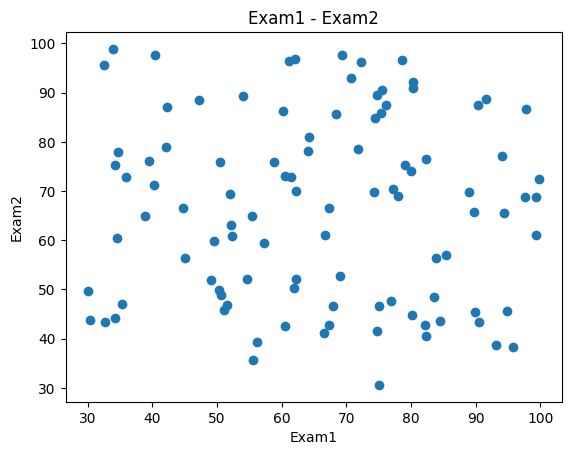

In [4]:
# Visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:, "Exam1"], data.loc[:, 'Exam2'])
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

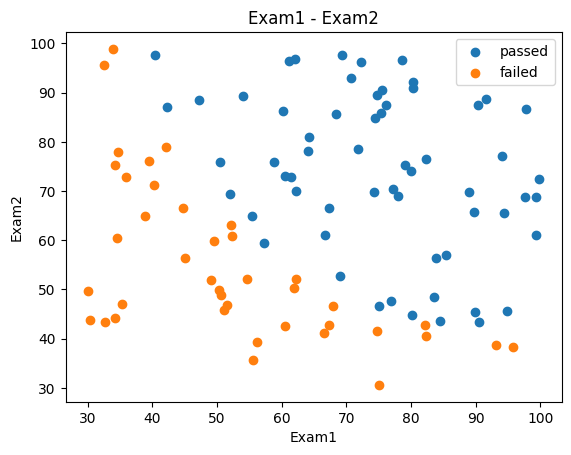

In [5]:
# add label mask
mask = data.loc[:, 'Pass']==1
fig1 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, 'Exam2'][~mask])
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [6]:
# define x,y
x = data.drop(['Pass'], axis=1)
y = data.loc[:, 'Pass']
x1 = data.loc[:, 'Exam1']
x2 = data.loc[:, 'Exam2']

In [7]:
# establish the model and train it
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
# show the predict result and its accuracy
y_predict = LR.predict(x)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.89


In [10]:
# exam1=70 exam2=65
y_test = LR.predict([[70, 65]])
print('passed' if y_test == 1 else 'failed')

passed


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


See the judgement edge.

In [11]:
LR.coef_

array([[0.20535491, 0.2005838 ]])

In [12]:
LR.intercept_

array([-25.05219314])

In [13]:
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]
x2_new = -(theta0+theta1*x1)/theta2
print(x2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


<Figure size 640x480 with 0 Axes>

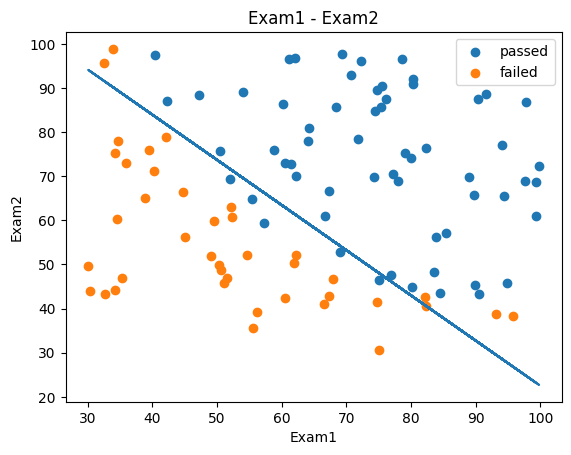

In [14]:
fig3 = plt.figure()
# add label mask
mask = data.loc[:, 'Pass']==1
fig1 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, 'Exam2'][~mask])
plt.plot(x1,x2_new)
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

Create 2D function
theta0+theta1*X1+theta2*X2+theta3*X1^2+theta4*X2^2+theta5*X1*X2 = 0

In [15]:
# create new data
x1_2 = x1 * x1
x2_2 = x2 * x2
x1_x2 = x1 * x2


X_new = {
    'X1':x1, 
    'X2':x2, 
    'X1_2':x1_2,
    'X2_2':x2_2,
    'X1_X2':x1_x2
}

x_new = pd.DataFrame(X_new)
print(x_new)

           X1         X2         X1_2         X2_2        X1_X2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]


In [16]:
# establish new model and train
LR2 = LogisticRegression()
LR2.fit(x_new, y)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [17]:
y2_predict = LR2.predict(x_new)
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

1.0


63    136.665610
1     135.308100
57    122.519811
70    121.759275
36    115.764579
         ...    
56     39.038428
47     39.015412
51     38.748689
97     38.741337
75     38.653420
Name: Exam1, Length: 100, dtype: float64


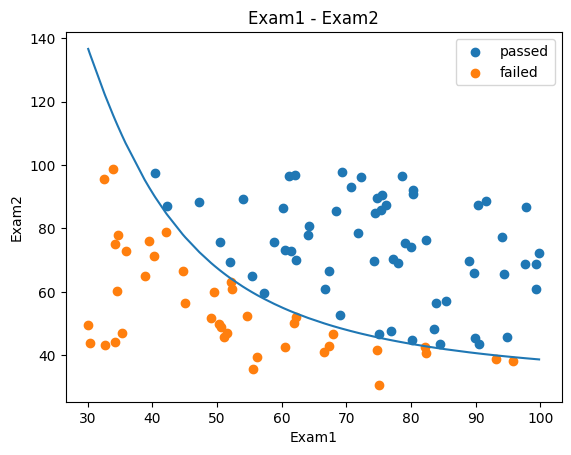

In [18]:
x1_new = x1.sort_values()

theta0 = LR2.intercept_
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5*x1_new+theta2
c = theta0+theta1*x1_new+theta3*x1_new*x1_new
x2_new_boundary = (-b+np.sqrt(b*b - 4*a*c)) / (2*a)
print(x2_new_boundary)

mask = data.loc[:, 'Pass']==1
fig5 = plt.figure()
passed = plt.scatter(data.loc[:, "Exam1"][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, "Exam1"][~mask], data.loc[:, 'Exam2'][~mask])
plt.plot(x1_new, x2_new_boundary)
plt.title('Exam1 - Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()